In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
# Specify the folder path where your datasets are located
folder_path = 'ai_assign'  # Update this to the folder where the datasets are located

# Initialize an empty list to store cleaned DataFrames
cleaned_dataframes = []

# List all Excel files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

In [94]:
# Loop through each file in the folder
for file in files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing file: {file}")
    
    # Load the dataset
    df = pd.read_excel(file_path)
    
    # Print column names for verification
    print(f"Columns in {file}: {df.columns.tolist()}")
    
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    
    # Define critical columns
    required_columns = ['Transcript', 'Resume', 'Job Description', 'Decision']
    available_columns = [col for col in required_columns if col in df.columns]
    
    if available_columns:
        # Drop rows with missing values in critical columns
        df.dropna(subset=available_columns, inplace=True)
    else:
        print(f"Warning: None of the critical columns {required_columns} are found in {file}.")
    
    # Fill missing values in non-critical columns
    df.fillna('Not Specified', inplace=True)
      # Append source file name for tracking
    df['Source_File'] = file
    
    # Append cleaned DataFrame to the list
    cleaned_dataframes.append(df)

# Combine all cleaned DataFrames into one
combined_df = pd.concat(cleaned_dataframes, ignore_index=True)
print(f"Combined dataset shape: {combined_df.shape}")

Processing file: dataset4.xlsx
Columns in dataset4.xlsx: ["Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**I

In [95]:
# Function to clean text columns
def clean_text_column(column):
    """
    Cleans a text column by:
    1. Removing all non-alphabetic characters.
    2. Removing extra spaces.
    3. Converting text to lowercase.
    """
    if column.dtype == 'object':  # Only apply to text columns
        return column.str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip().str.lower()
    return column

# Clean specific text columns
columns_to_clean = ['Transcript', 'Resume', 'Job Description', 'Reason for decision']
for col in columns_to_clean:
    if col in combined_df.columns:
        combined_df[col] = clean_text_column(combined_df[col])

# Display cleaned data for verification
print("Cleaned Data Sample:")
print(combined_df.head())

Cleaned Data Sample:
  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software e

In [96]:
# Generate summary insights
insights = {}

# Total Candidates
insights['Total Candidates'] = len(combined_df)

# Selected and Rejected Candidates
if 'Decision' in combined_df.columns:
    decision_counts = combined_df['Decision'].str.strip().value_counts()
    insights['Selected Candidates'] = decision_counts.get('select', 0)
    insights['Rejected Candidates'] = decision_counts.get('reject', 0)
else:
    insights['Selected Candidates'] = "Column 'Decision' not found"
    insights['Rejected Candidates'] = "Column 'Decision' not found"

# Most Common Reason for Decision
if 'Reason for decision' in combined_df.columns:
    insights['Most Common Reason for Decision'] = combined_df['Reason for decision'].mode()[0]
else:
    insights['Most Common Reason for Decision'] = "Column 'Reason for decision' not found"

# Print insights
print("Insights:")
for key, value in insights.items():
    print(f"{key}: {value}")

Insights:
Total Candidates: 6348
Selected Candidates: Column 'Decision' not found
Rejected Candidates: Column 'Decision' not found
Most Common Reason for Decision: technical knowledge


In [97]:
# Check for null values
print("Null values in combined dataset:")
print(combined_df.isnull().sum())

Null values in combined dataset:
Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a 

In [98]:
# Basic statistics for numeric columns
print("Basic statistics for numeric columns:")
print(combined_df.describe())

Basic statistics for numeric columns:
        Unnamed: 0  num_words_in_transcript
count  3348.000000              3348.000000
mean    874.354839               704.784349
std     503.809927               123.172745
min       0.000000                64.000000
25%     438.000000               617.000000
50%     876.500000               709.000000
75%    1308.000000               791.000000
max    1749.000000              1158.000000


In [99]:
print(combined_df.columns.tolist())

["Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, bein

In [100]:
excel_files

['dataset4.xlsx',
 'dataset5.xlsx',
 'dataset6.xlsx',
 'dataset7.xlsx',
 'dataset8.xlsx',
 'dataset9.xlsx',
 'dataset_1_2_3_combined.xlsx']

In [101]:
['dataset_1_2_3_combined','dataset4.xlsx','dataset5.xlsx','dataset6.xlsx','dataset7.xlsx','dataset8.xlsx','dataset9,xlsx']

['dataset_1_2_3_combined',
 'dataset4.xlsx',
 'dataset5.xlsx',
 'dataset6.xlsx',
 'dataset7.xlsx',
 'dataset8.xlsx',
 'dataset9,xlsx']

In [102]:
dataframes= {}
for file in excel_files:
    file_path=os.path.join(folder_path,file)
    dataframes[file]=pd.read_excel(file_path)
    print(f"Loaded{file} with shape{dataframes[file].shape}")
    combined_df=pd.concat(dataframes.values(),ignore_index=True)

Loadeddataset4.xlsx with shape(500, 8)
Loadeddataset5.xlsx with shape(200, 8)
Loadeddataset6.xlsx with shape(200, 8)
Loadeddataset7.xlsx with shape(200, 8)
Loadeddataset8.xlsx with shape(200, 8)
Loadeddataset9.xlsx with shape(200, 8)
Loadeddataset_1_2_3_combined.xlsx with shape(1674, 10)


In [103]:
import os
import pandas as pd

# Folder containing the Excel files
folder_path = "ai_assign"

# Collect Excel files from the folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx")]

# Loop through each file and print column names
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    
    # Load the Excel file into a DataFrame
    df = pd.read_excel(file_path)
    
    # Print the file name and its columns
    print(f"Columns in {file}:")
    print(df.columns.tolist())  # Convert to a list and print
    print("-" * 50)  # Separator between file outputs


Columns in dataset4.xlsx:
["Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a softw

In [104]:
combined_df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")


In [105]:
combined_df.rename(columns={"decision": "performance_(select/reject)"}, inplace=True)


In [106]:
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)
    
    # Rename columns for consistency
    df.rename(columns={
        'performance': 'performance_(select/reject)', 
        'job description': 'job_description',
        'reason for decision': 'reason_for_decision',
        'name': 'name',
        'role': 'role',
        'resume': 'resume',
        'transcript': 'transcript'
    }, inplace=True)
    
    # Re-append cleaned data
    dataframes[file] = df


In [107]:
combined_df.columns

Index(['Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role

In [108]:
 combined_df['Role'].value_counts()


Role
data engineer                   307
software engineer               307
product manager                 303
Data Scientist                  292
data scientist                  287
Software Engineer               225
Product Manager                 203
Data Engineer                   192
data analyst                    183
ui designer                     155
UI Engineer                     147
ui engineer                     132
Data Analyst                     78
UI Designer                      71
Software Developer               66
Project Manager                  56
Network Engineer                 16
DevOps Engineer                  16
Graphic Designer                 15
Digital Marketing Specialist     14
Machine Learning Engineer        13
AI Engineer                      13
HR Specialist                    12
Business Analyst                 11
Game Developer                   10
Database Administrator            9
Cybersecurity Specialist          9
Cloud Architect        

In [109]:
combined_df=pd.concat(dataframes.values(),ignore_index=True)
print(combined_df.info())
print(combined_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 12 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [110]:
combined_df.isnull().sum()

Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, being 

In [111]:
print(combined_df.columns)


Index(['Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role

In [112]:
combined_df['decision'].value_counts()

decision
reject      970
select      904
selected    307
rejected    293
Select      103
Reject       97
Name: count, dtype: int64

In [113]:
combined_df['length_of_transcript']=combined_df['Transcript'].apply(lambda x:len(x))


In [114]:
combined_df[['length_of_transcript','decision']]

,length_of_transcript,decision
0,3342,NaN
1,5201,NaN
2,2977,NaN
3,4331,NaN
4,3527,NaN
...,...,...
3169,4858,select
3170,4667,reject
3171,5600,select
3172,5222,reject


In [115]:
print(combined_df.columns)



Index(['Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role

In [116]:
# Group by Job_Description and count resumes
job_description_counts = combined_df.groupby('Job Description').size().reset_index(name='Resume_Count')

print(job_description_counts)


                                        Job Description  Resume_Count
0     \n        we are seeking a qualified data engi...             1
1     \n        we are seeking a qualified data engi...             1
2     \n        we are seeking a qualified data engi...             1
3     \n        we are seeking a qualified data engi...             1
4     \n        we are seeking a qualified data engi...             1
...                                                 ...           ...
1802  we are looking for a skilled ui engineer with ...             2
1803  we are looking for a skilled ui engineer with ...             1
1804  we are looking for a skilled ui engineer with ...             1
1805  we are looking for a skilled ui engineer with ...             1
1806  we are looking for a skilled ui engineer with ...             1

[1807 rows x 2 columns]


In [117]:
print(combined_df.isnull().sum())

Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, being 

In [118]:
print(combined_df.describe())


        Unnamed: 0  num_words_in_transcript  length_of_transcript
count  1674.000000              1674.000000           3174.000000
mean    874.354839               704.784349           4286.408318
std     503.885207               123.191149            926.497407
min       0.000000                64.000000            393.000000
25%     438.250000               617.000000           3595.500000
50%     876.500000               709.000000           4310.000000
75%    1307.750000               791.000000           4958.750000
max    1749.000000              1158.000000           7713.000000


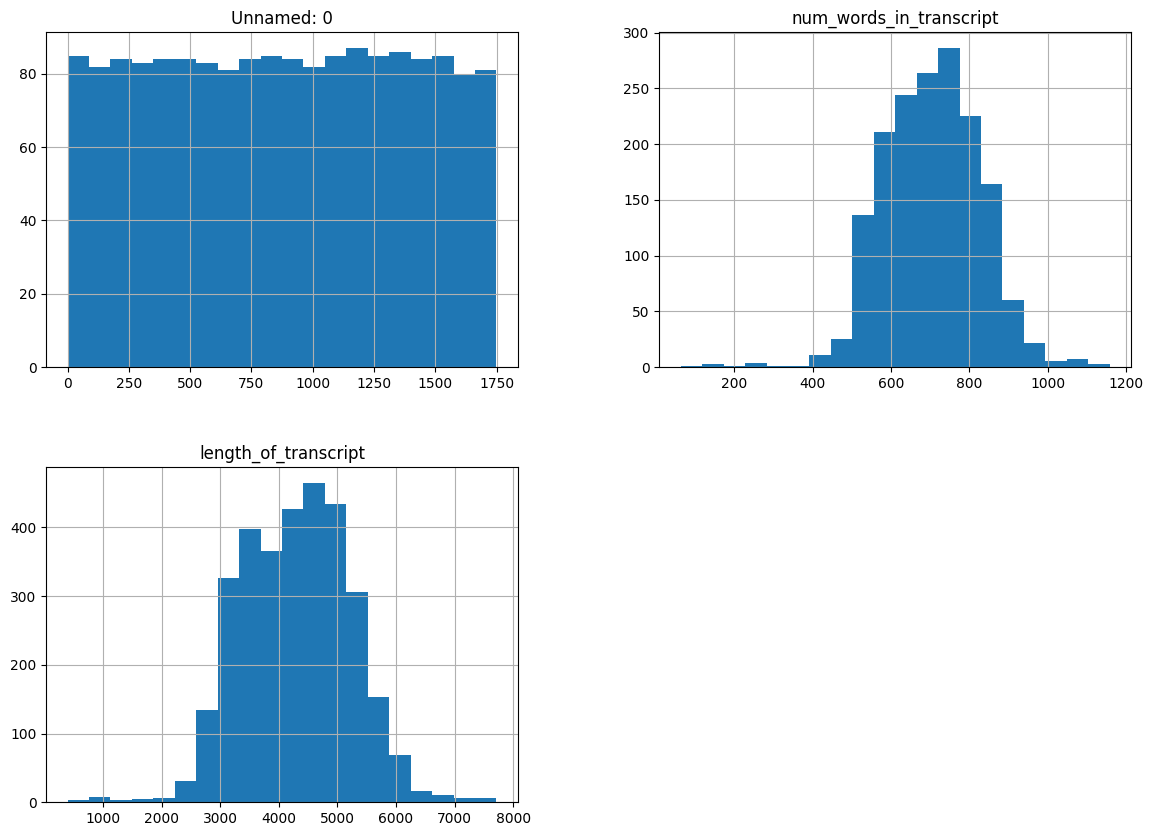

In [119]:
combined_df.hist(figsize=(14, 10), bins=20)
plt.show()


In [120]:
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


ImportError: 
BertModel requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


In [ ]:
# Sample text data
texts = combined_df['Transcript'].tolist()

# Tokenize the text data
tokens = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')


In [ ]:
# Get BERT embeddings
with torch.no_grad():
    outputs = model(**tokens)
    embeddings = outputs.last_hidden_state

# Convert embeddings to a numpy array
embeddings = embeddings.numpy()


In [ ]:
!pip install wordcloud


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='Role', order=combined_df['Role'].value_counts().index, palette='viridis')
plt.title('Distribution of Job Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='decision', hue='Role', palette='pastel')
plt.title('Count of decisions by Role')
plt.xlabel('decision')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Role')
plt.show()


In [ ]:
combined_df['Word_Count'] = combined_df['Transcript'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 8))
sns.histplot(data=combined_df, x='Word_Count', bins=30, kde=True, color='green')
plt.title('Word Count Distribution in Transcripts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Role' and 'Decision' columns
le_role = LabelEncoder()
combined_df['Role_Encoded'] = le_role.fit_transform(combined_df['Role'])

le_decision = LabelEncoder()
combined_df['decision_Encoded'] = le_decision.fit_transform(combined_df['decision'])

print(combined_df.head())


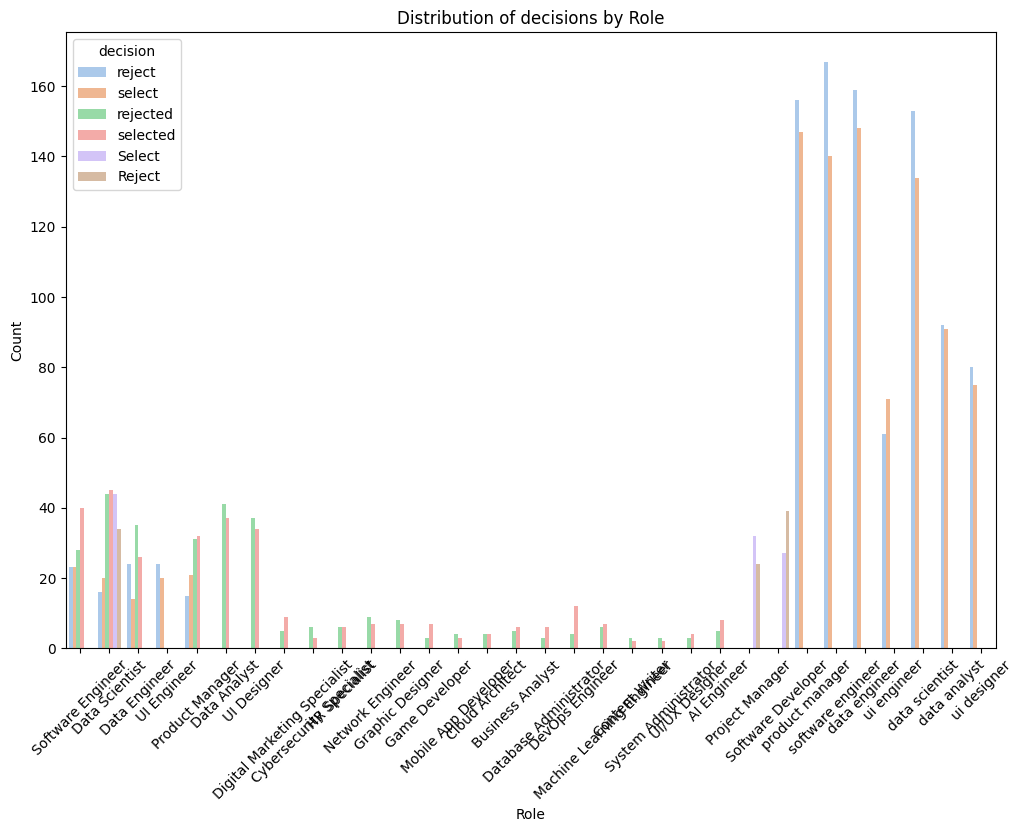

In [124]:
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='Role', hue='decision', palette='pastel')
plt.title('Distribution of decisions by Role')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='decision')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7036\1543415852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Role', y='Transcript_Length', palette='Set3')


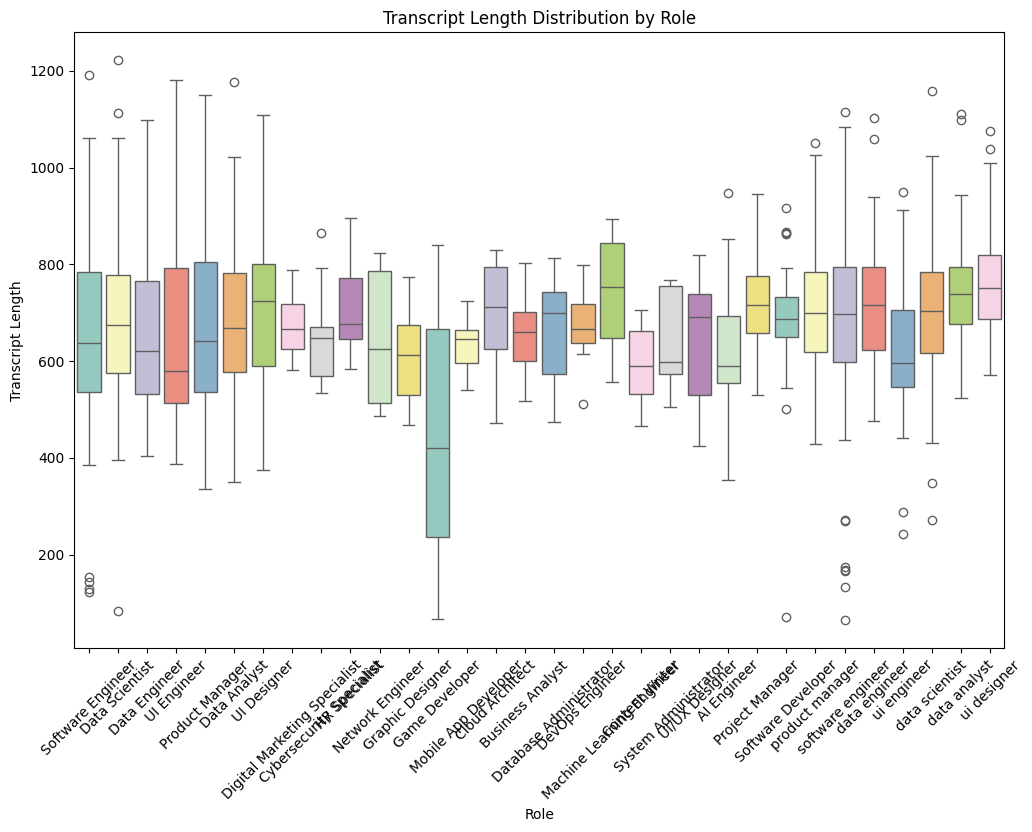

In [125]:
combined_df['Transcript_Length'] = combined_df['Transcript'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df, x='Role', y='Transcript_Length', palette='Set3')
plt.title('Transcript Length Distribution by Role')
plt.xlabel('Role')
plt.ylabel('Transcript Length')
plt.xticks(rotation=45)
plt.show()


In [126]:
from scipy.stats import chi2_contingency

# Contingency table for Role and Decision
contingency_table = pd.crosstab(combined_df['Role'], combined_df['decision'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")


Chi-square test statistic: 4123.191389221652
P-value: 0.0


In [127]:
import pandas as pd
import numpy as np

# Load your dataset
combined_df = pd.concat(dataframes.values(),ignore_index=True)

# Check the first few rows
print(combined_df.head())

# Extract the 'Role' and 'Transcript' columns
roles = combined_df['Role'].values
transcripts = combined_df['Transcript'].values

# Compute the length of each transcript
transcript_lengths = np.array([len(str(transcript).split()) for transcript in transcripts])

# Create a dictionary to store the lengths of transcripts for each role
role_transcript_lengths = {}

for role, length in zip(roles, transcript_lengths):
    if role not in role_transcript_lengths:
        role_transcript_lengths[role] = []
    role_transcript_lengths[role].append(length)

# Calculate statistics for each role
role_statistics = {role: (np.mean(lengths), np.std(lengths)) for role, lengths in role_transcript_lengths.items()}

# Create a structured array to store the statistics
dtype = [('Role', 'U50'), ('Mean_Length', 'f4'), ('Std_Length', 'f4')]
role_stats_array = np.array([(role, stats[0], stats[1]) for role, stats in role_statistics.items()], dtype=dtype)

# Display the array
print(role_stats_array)


  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, bein

C:\Users\HP\AppData\Local\Temp\ipykernel_7036\2797527682.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Role', y='Sentiment_Polarity', palette='Set2')


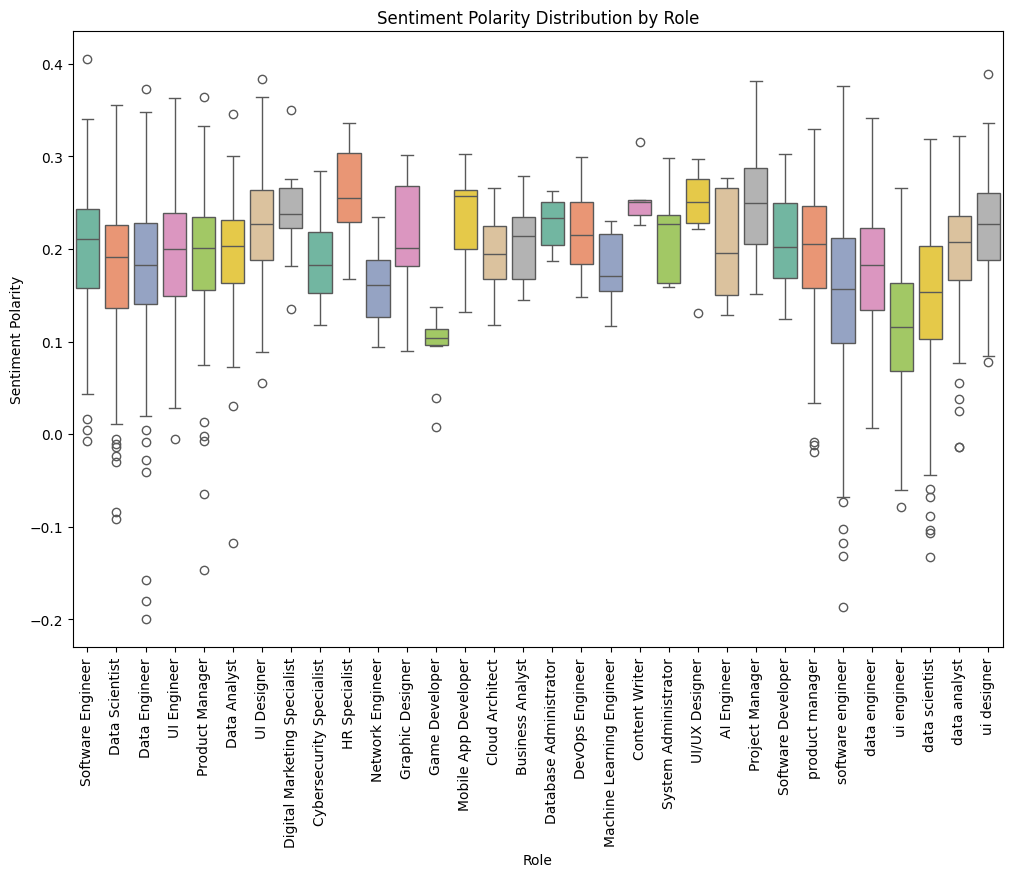

In [128]:
!pip install textblob
from textblob import TextBlob


# Calculate sentiment polarity for each transcript
combined_df['Sentiment_Polarity'] = combined_df['Transcript'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Box plot of sentiment polarity by role
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df, x='Role', y='Sentiment_Polarity', palette='Set2')
plt.title('Sentiment Polarity Distribution by Role')
plt.xlabel('Role')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=90)
plt.show()


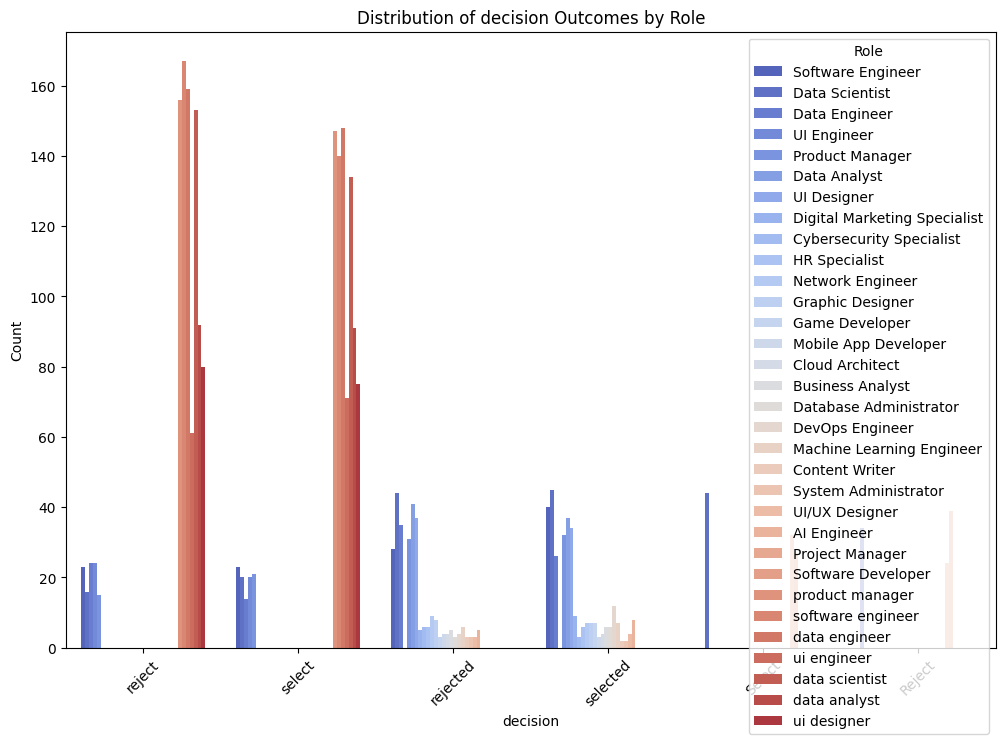

In [129]:
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='decision', hue='Role', palette='coolwarm')
plt.title('Distribution of decision Outcomes by Role')
plt.xlabel('decision')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Role')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7036\160777719.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigrams_df, x='Frequency', y='Bigram', palette='viridis')


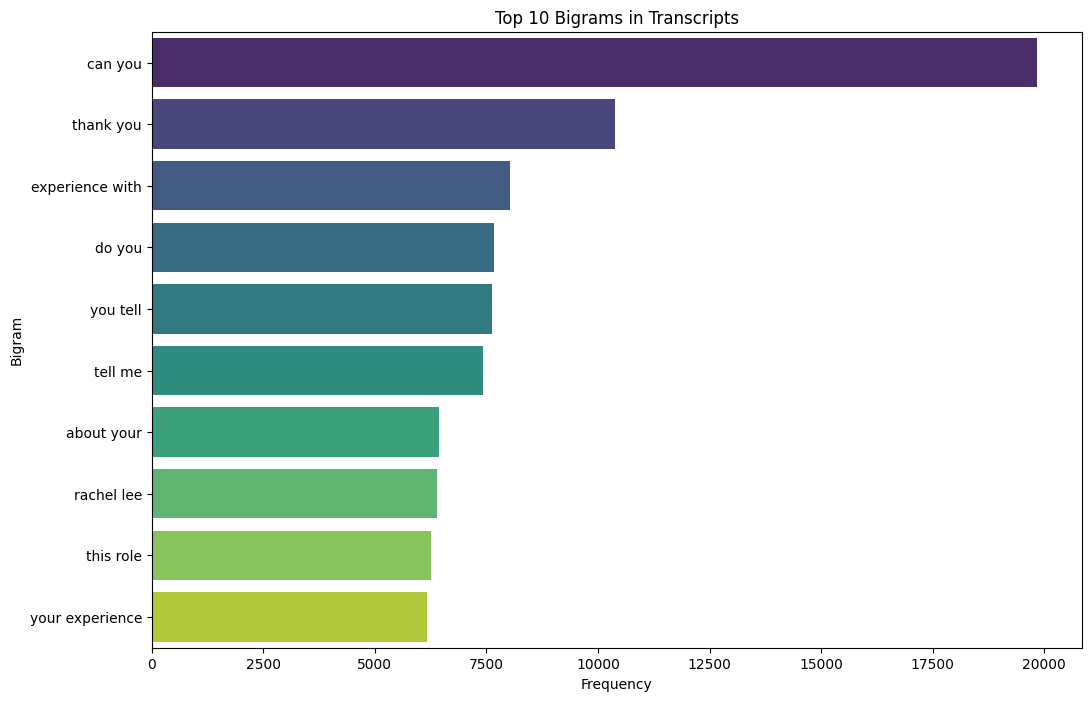

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Extract top bigrams
bigrams = get_top_ngrams(combined_df['Transcript'].dropna(), n=10, ngram_range=(2, 2))

# Plot top bigrams
bigrams_df = pd.DataFrame(bigrams, columns=['Bigram', 'Frequency'])
plt.figure(figsize=(12, 8))
sns.barplot(data=bigrams_df, x='Frequency', y='Bigram', palette='viridis')
plt.title('Top 10 Bigrams in Transcripts')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


In [131]:
!pip install wordcloud


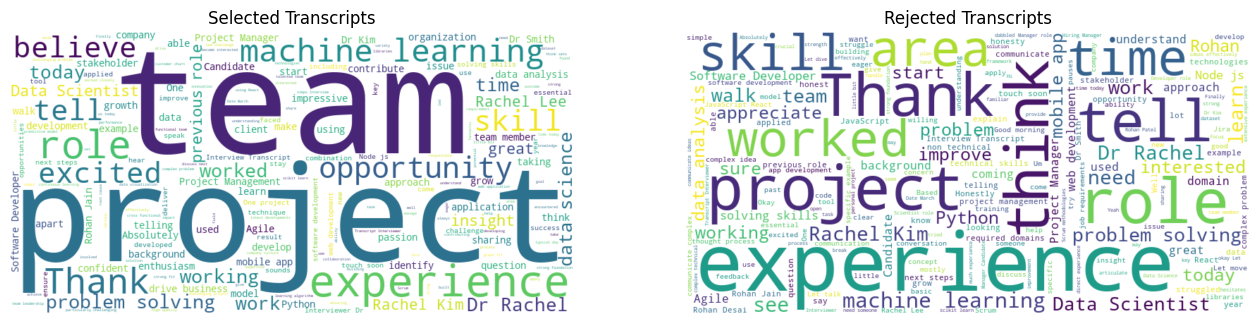

C:\Users\HP\AppData\Local\Temp\ipykernel_7036\837361047.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_selected_df, x='Frequency', y='Keyword', palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_7036\837361047.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_rejected_df, x='Frequency', y='Keyword', palette='plasma')


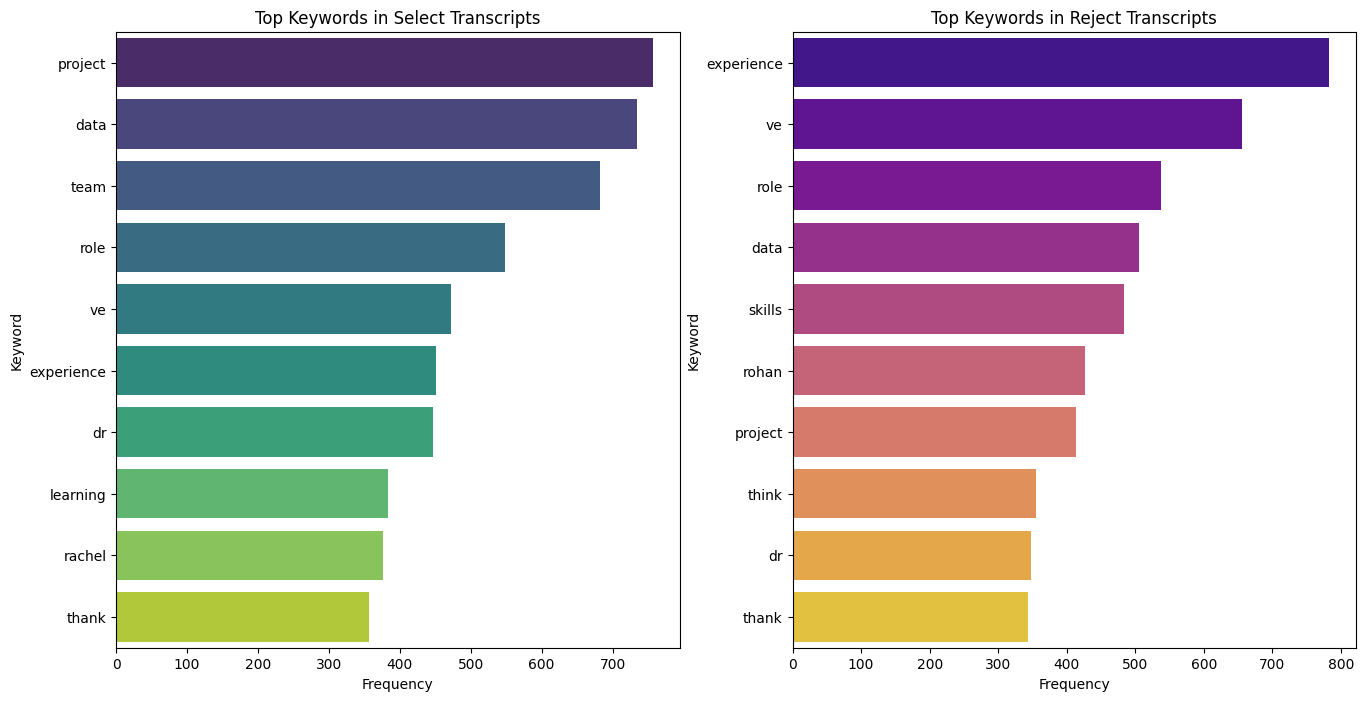

In [132]:
import pandas as pd

# Load your dataset
combined_df = pd.concat(dataframes.values(),ignore_index=True)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate selected and rejected transcripts
selected_transcripts = ' '.join(combined_df[combined_df['decision'] == 'Select']['Transcript'].dropna())
rejected_transcripts = ' '.join(combined_df[combined_df['decision'] == 'Reject']['Transcript'].dropna())

# Generate word clouds
selected_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(selected_transcripts)
rejected_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(rejected_transcripts)

# Visualize the word clouds
plt.figure(figsize=(16, 8))

# Selected transcripts
plt.subplot(1, 2, 1)
plt.imshow(selected_wordcloud, interpolation='bilinear')
plt.title('Selected Transcripts')
plt.axis('off')

# Rejected transcripts
plt.subplot(1, 2, 2)
plt.imshow(rejected_wordcloud, interpolation='bilinear')
plt.title('Rejected Transcripts')
plt.axis('off')

plt.show()
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top keywords
def get_top_keywords(text, n=10):
    vec = CountVectorizer(stop_words='english').fit([text])
    bag_of_words = vec.transform([text])
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top keywords for selected and rejected transcripts
top_keywords_selected = get_top_keywords(selected_transcripts, n=10)
top_keywords_rejected = get_top_keywords(rejected_transcripts, n=10)

# Convert to DataFrame for visualization
keywords_selected_df = pd.DataFrame(top_keywords_selected, columns=['Keyword', 'Frequency'])
keywords_rejected_df = pd.DataFrame(top_keywords_rejected, columns=['Keyword', 'Frequency'])

# Plot top keywords
plt.figure(figsize=(16, 8))

# Selected transcripts
plt.subplot(1, 2, 1)
sns.barplot(data=keywords_selected_df, x='Frequency', y='Keyword', palette='viridis')
plt.title('Top Keywords in Select Transcripts')

# Rejected transcripts
plt.subplot(1, 2, 2)
sns.barplot(data=keywords_rejected_df, x='Frequency', y='Keyword', palette='plasma')
plt.title('Top Keywords in Reject Transcripts')

plt.show()




C:\Users\HP\AppData\Local\Temp\ipykernel_7036\2404902605.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skills_df, x='Frequency', y='Skill', palette='Blues_d')


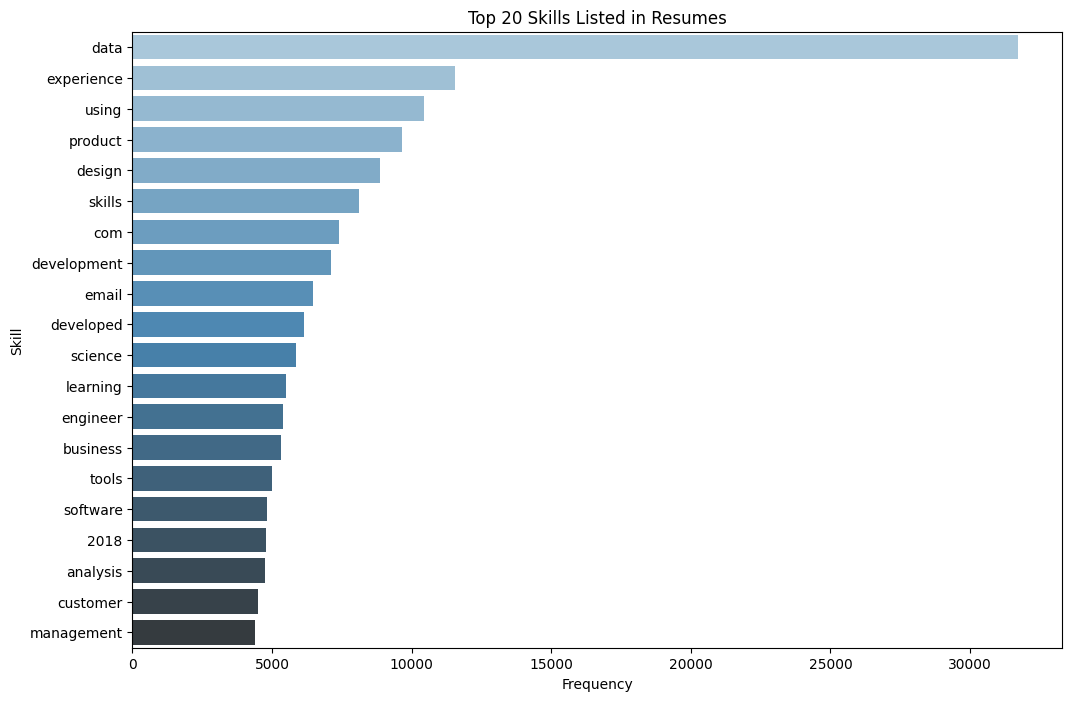

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract skills from resumes
skills = combined_df['Resume'].dropna()

# Vectorize skills
vectorizer = CountVectorizer(stop_words='english')
skills_matrix = vectorizer.fit_transform(skills)
skills_sum = skills_matrix.sum(axis=0)
skills_freq = [(word, skills_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
skills_freq = sorted(skills_freq, key=lambda x: x[1], reverse=True)

# Get top 20 skills
top_skills = skills_freq[:20]

# Convert to DataFrame
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Frequency'])

# Plot top skills
plt.figure(figsize=(12, 8))
sns.barplot(data=skills_df, x='Frequency', y='Skill', palette='Blues_d')
plt.title('Top 20 Skills Listed in Resumes')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7036\3717703446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='decision', y='Resume_Length', palette='coolwarm')


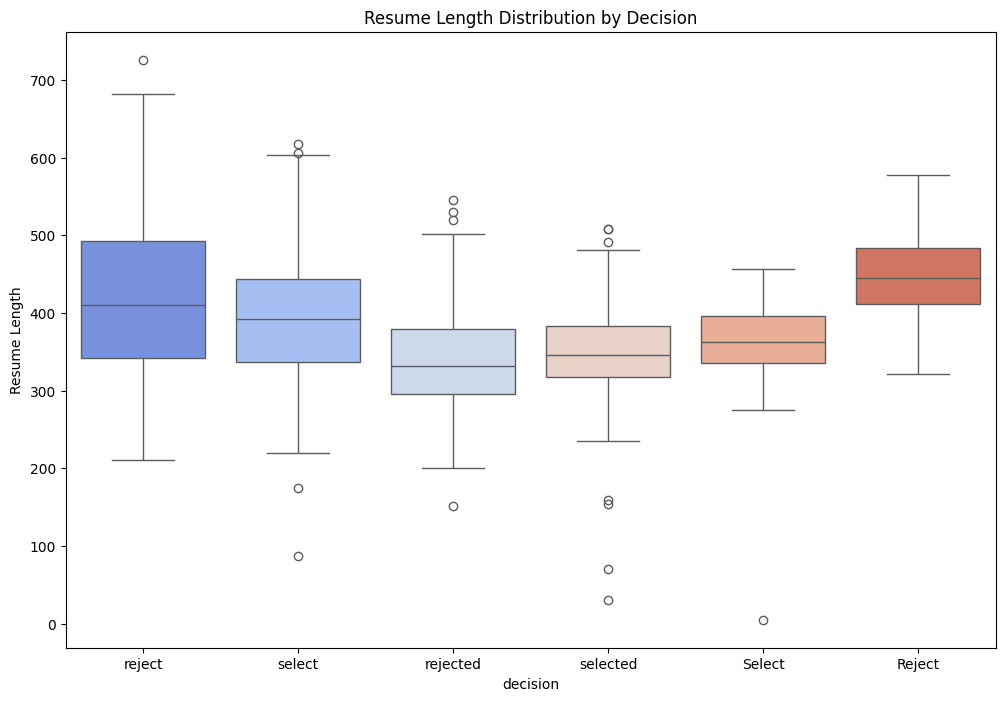

In [135]:
combined_df['Resume_Length'] = combined_df['Resume'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df, x='decision', y='Resume_Length', palette='coolwarm')
plt.title('Resume Length Distribution by Decision')
plt.xlabel('decision')
plt.ylabel('Resume Length')
plt.show()
